In [1]:
from pulp import LpProblem, LpStatus, lpSum, LpVariable, LpMinimize
import matplotlib.pyplot as plt
import numpy as np

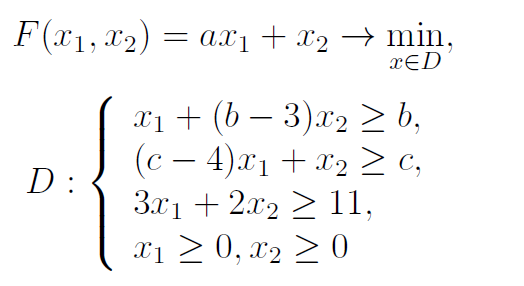

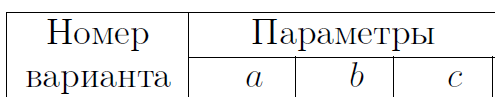

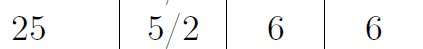

### Ограничения

x1 + 3x2 >= 6  
2x1 + x2 >= 6  
3x1 + 2x2 >= 11  
x1>=0  
x2>=0  

### Выразим x2

A(x2) = (6 - x1) / 3  
B(x2) = 6 - 2 * x1  
C(x2) = (11 - 3x1) / 2  

In [2]:
x1 = np.linspace(-7, 10, 17, dtype='int')
A = (6 - x1) / 3  
B = 6 - 2 * x1
C = (11 - 3 * x1) / 2

#### Задача минимизации

In [3]:
model = LpProblem(name="resource-allocation", sense = LpMinimize)
model

resource-allocation:
MINIMIZE
None
VARIABLES

In [4]:
x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)

#### Пропишем ограничения

In [5]:
A_constraint = x1 + 3 * x2 >= 6
B_constraint = 2 * x1 + x2 >= 6
C_constraint = 3 * x1 + 2 * x2 >= 11

obj_f = 2.5 * x1 + x2

model += (A_constraint, "A")
model += (B_constraint, "B")
model += (C_constraint, "C")
model += (obj_f)
model

resource-allocation:
MINIMIZE
2.5*x1 + 1*x2 + 0.0
SUBJECT TO
A: x1 + 3 x2 >= 6

B: 2 x1 + x2 >= 6

C: 3 x1 + 2 x2 >= 11

VARIABLES
x1 Continuous
x2 Continuous

In [6]:
status = model.solve()

In [7]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}")
F = model.objective.value()
print(f"Оптимальное значение целевой функции: {F}")

x1_total, x2_total = 0, 0
x1_total = model.variables()[0].value()
x2_total = model.variables()[1].value()

print(f"Оптимальный план: (x1 = {int(x1_total)}, x2 = {int(x2_total)})")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 6.0
Оптимальный план: (x1 = 0, x2 = 6)


#### Графическое решение

В данном случае линии ограничений x1 >= 0, x2 >= 0 являются осями коордиднат. 

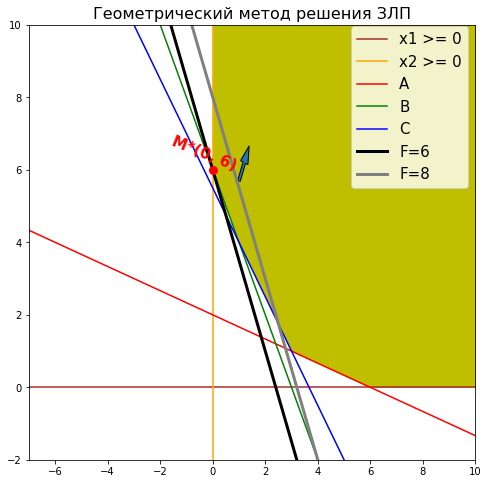

In [19]:
x1 = np.linspace(-7, 10, 17, dtype='int')
mas2 = np.linspace(10, 10, 17, dtype='int')
x_axis = np.linspace(0, 0, 17, dtype='int')
y_axis = np.linspace(10, -2, 17, dtype='int')

plt.figure(figsize=(8, 8))
plt.plot(x1, x_axis, color='brown', label='x1 >= 0')
plt.plot(x_axis, y_axis, color='orange', label='x2 >= 0')

plt.plot(x1, A, color='red', label='A')

plt.plot(x1, B, color='green', label='B')

plt.plot(x1, C, color='blue', label='C')

n = 13
plt.fill_between(x1[n:], mas2[n:], color='y')
plt.fill_between(x1[10:n+1], A[10:n+1], mas2[10:n+1], color='y')
plt.fill_between(x1[8:11], C[8:11], mas2[8:11], color='y')
plt.fill_between(x1[7:9], B[7:9], mas2[7:9], color='y')


plt.text(x1_total + 1, x2_total,f'M*({int(x1_total)}, {int(x2_total)})',horizontalalignment='right', color="red"
         , rotation=-22, fontsize=15, fontweight="bold")

x_total_graph = F - x1*2.5
plt.plot(x1, x_total_graph, color='black', label='F=6', linewidth=3)

F_test = 8
x_test_graph = F_test - x1*2.5
plt.plot(x1, x_test_graph, color='grey', label='F=8', linewidth=3)
plt.legend(bbox_to_anchor=(1, 1.01525), fontsize=15)
plt.arrow(1, 5.7, 0.2, 0.5,
         width = 0.1,
         head_length = 0.5)
plt.plot(x1_total, x2_total, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
plt.title("Геометрический метод решения ЗЛП",fontsize=16)
plt.axis([-7, 10, -2, 10])
plt.show()

In [9]:
print(f'Ответ: M*({x1_total};{x2_total}); Fmin = {F}')

Ответ: M*(0.0;6.0); Fmin = 6.0
